# Prédiction de Salaires - Régression Linéaire Multiple

## Objectif
Ce notebook présente une analyse complète de régression linéaire multiple pour prédire les salaires des employés.

## Plan d'analyse
1. **Exploration des données**
2. **Préparation des données**
3. **Modélisation**
   - Baseline avec DummyRegressor
   - Régression linéaire simple
4. **Réugularisation avec GridSearchCV**
   - Ridge Regression (L2)
   - Lasso Regression (L1)
6. **Résumé et Comparaison Finale**

In [1]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Chargement et Exploration des Données

In [16]:
# Chargement des données

# TO DO : Charger le dataset employee_salaries.csv dans un DataFrame pandas et afficher les 5 premières lignes ainsi que la shape du dataset
df = pd.read_csv("data/employee_salaries.csv")

In [26]:
df.head()

,age,experience,education_years,heures_semaine,nb_projets,evaluation_performance,anciennete_entreprise,niveau_education,departement,poste,ville,secteur,taille_entreprise,salaire_annuel
0,38,5,0,39,3.0,2.9,2,Bac,Marketing,Senior,Paris,Services,Grande Entreprise,95600.0
1,29,0,1,35,1.0,4.6,0,Bac,Finance,Junior,Paris,Services,ETI,41500.0
2,25,1,0,37,0.0,4.4,0,Bac,R&D,Junior,Autres,Santé,Grande Entreprise,44300.0
3,25,1,4,40,3.0,7.4,0,Master,Ventes,Junior,Toulouse,Services,ETI,57100.0
4,37,5,1,41,7.0,5.0,0,Bac,IT,Senior,Paris,Tech,ETI,128000.0


In [25]:
# Informations sur le dataset et statistiques descriptives

# TO DO : Afficher les informations statistiques sur le dataset ainsi que le nombre de valeurs manquantes par colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   experience              10000 non-null  int64  
 2   education_years         10000 non-null  int64  
 3   heures_semaine          10000 non-null  int64  
 4   nb_projets              9900 non-null   float64
 5   evaluation_performance  9800 non-null   float64
 6   anciennete_entreprise   10000 non-null  int64  
 7   niveau_education        10000 non-null  object 
 8   departement             10000 non-null  object 
 9   poste                   10000 non-null  object 
 10  ville                   10000 non-null  object 
 11  secteur                 10000 non-null  object 
 12  taille_entreprise       10000 non-null  object 
 13  salaire_annuel          10000 non-null  float64
dtypes: float64(3), int64(5), object(6)
memo

In [23]:
df.isnull().sum()

age                         0
experience                  0
education_years             0
heures_semaine              0
nb_projets                100
evaluation_performance    200
anciennete_entreprise       0
niveau_education            0
departement                 0
poste                       0
ville                       0
secteur                     0
taille_entreprise           0
salaire_annuel              0
dtype: int64

In [32]:
# Séparation des variables numériques et catégorielles

# TO DO : créer deux listes qui séparent les variables numériques et catégorielles
num_vars = df.select_dtypes(include=np.number).columns.tolist()
cat_vars = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
cat_vars

['niveau_education',
 'departement',
 'poste',
 'ville',
 'secteur',
 'taille_entreprise']

--- 1. Analyse des Variables Numériques (Distribution et Outliers) ---


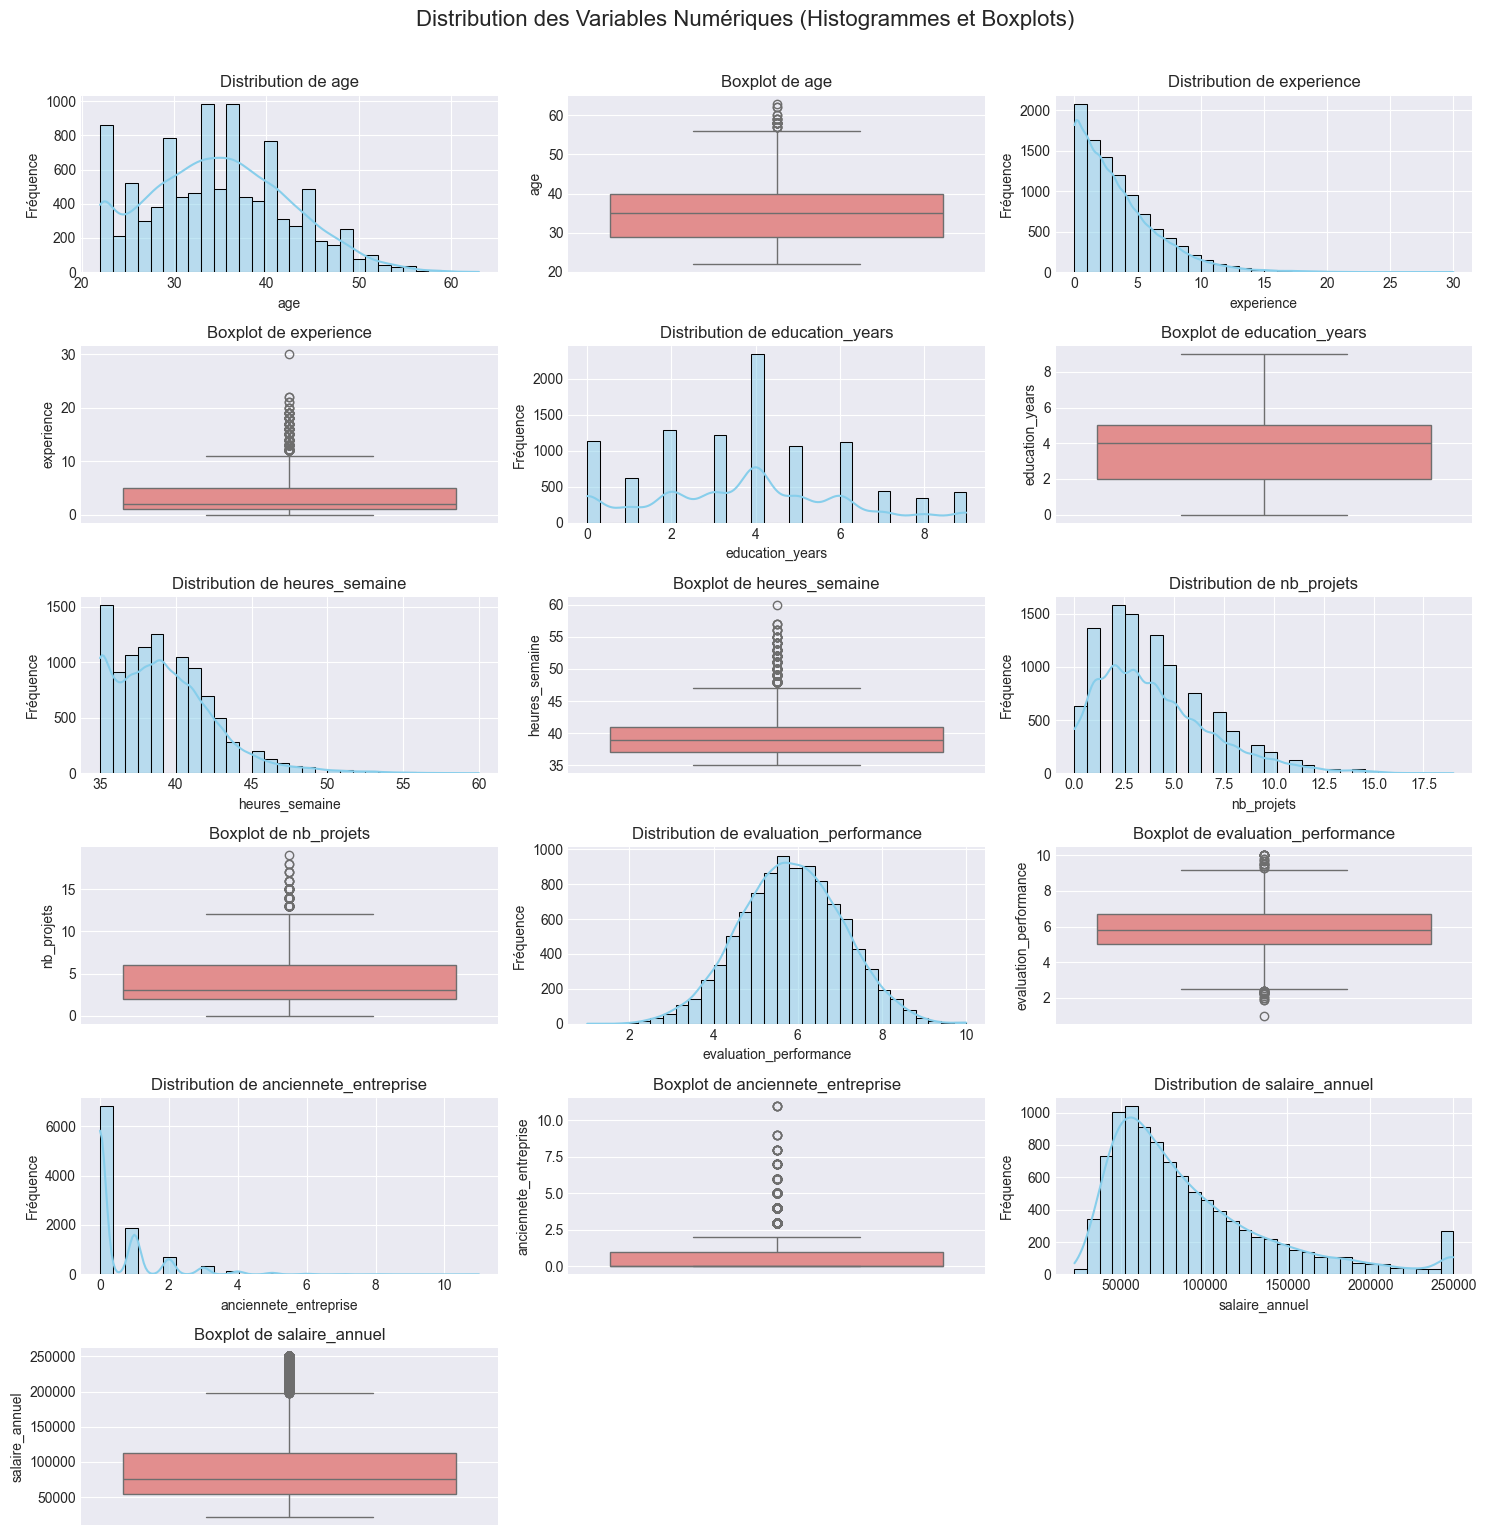


--- 2. Relation Variable Numérique vs Cible 'salaire' (Nuages de points) ---


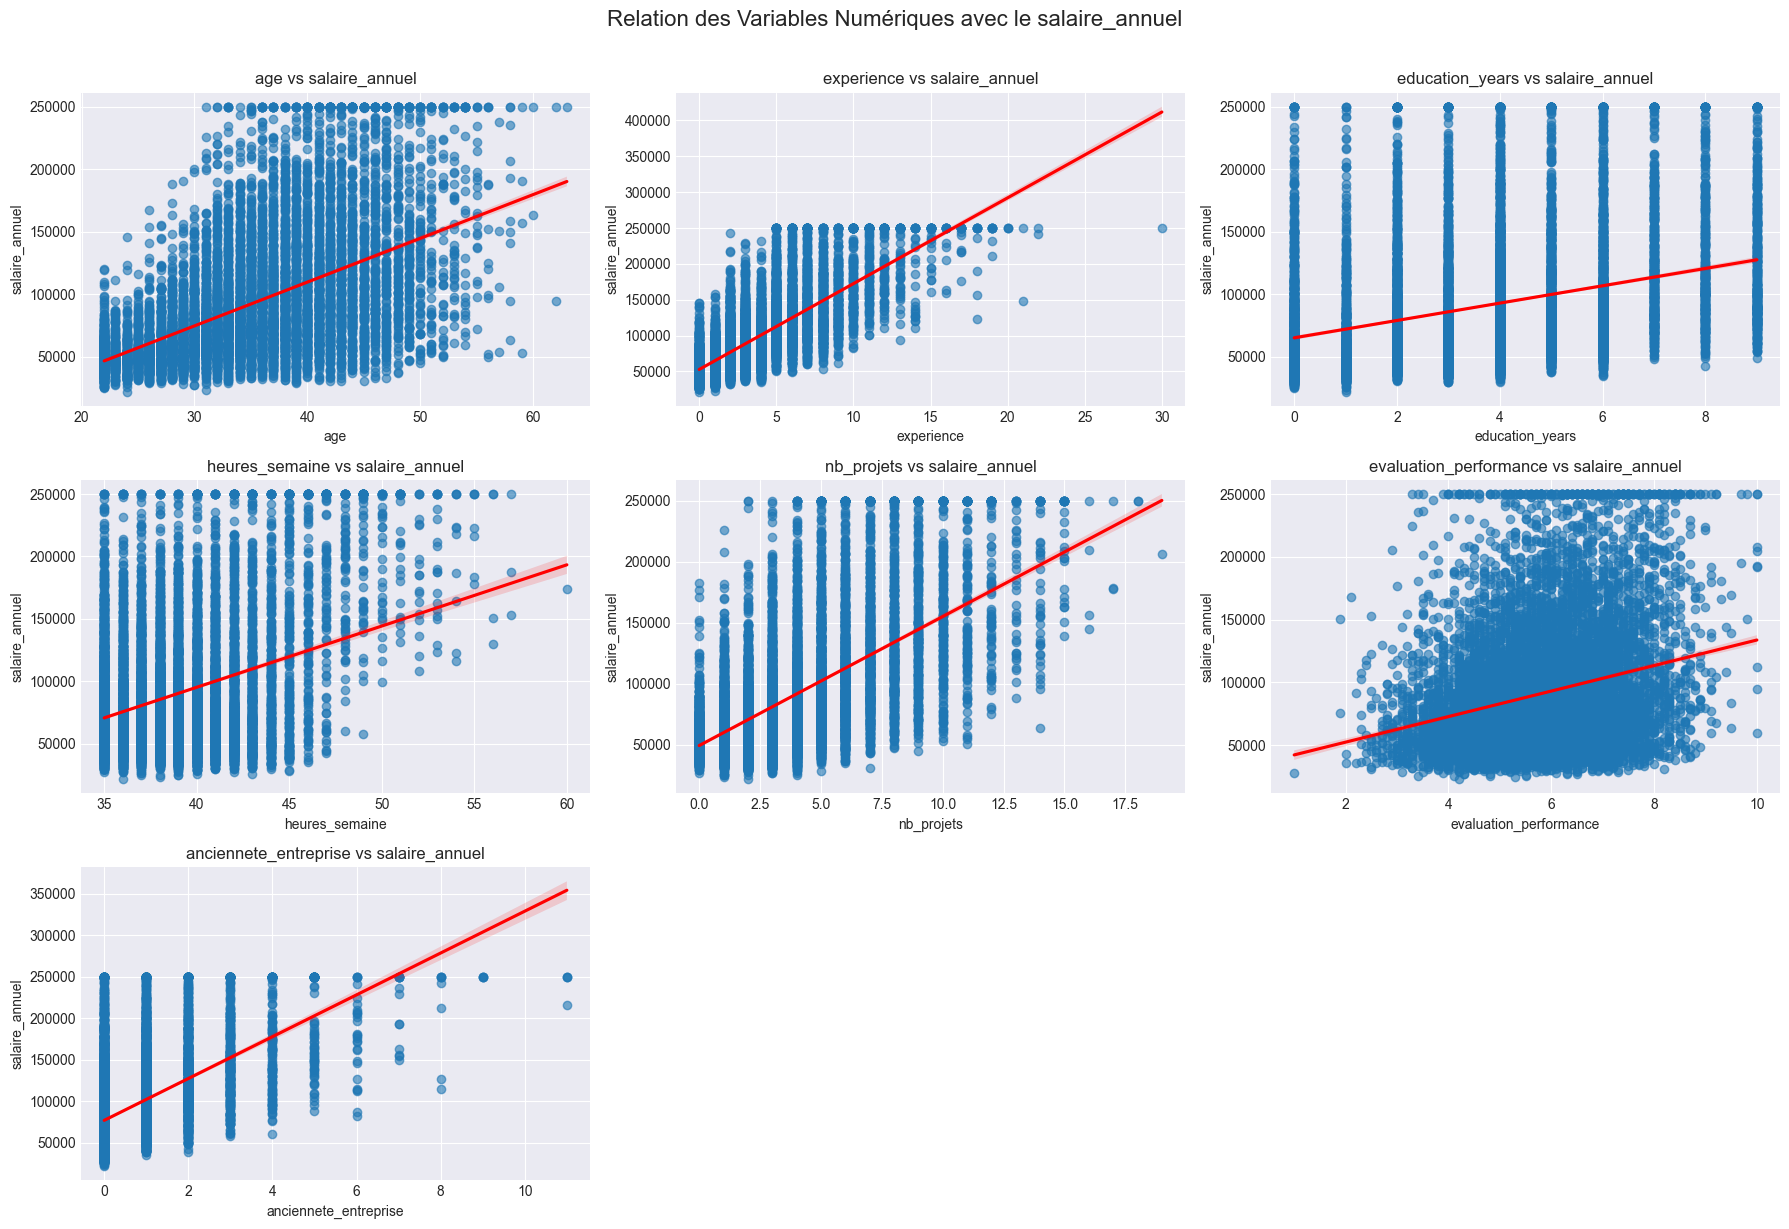


--- 3. Relation Variable Catégorielle vs Cible 'salaire' (Boxplots) ---


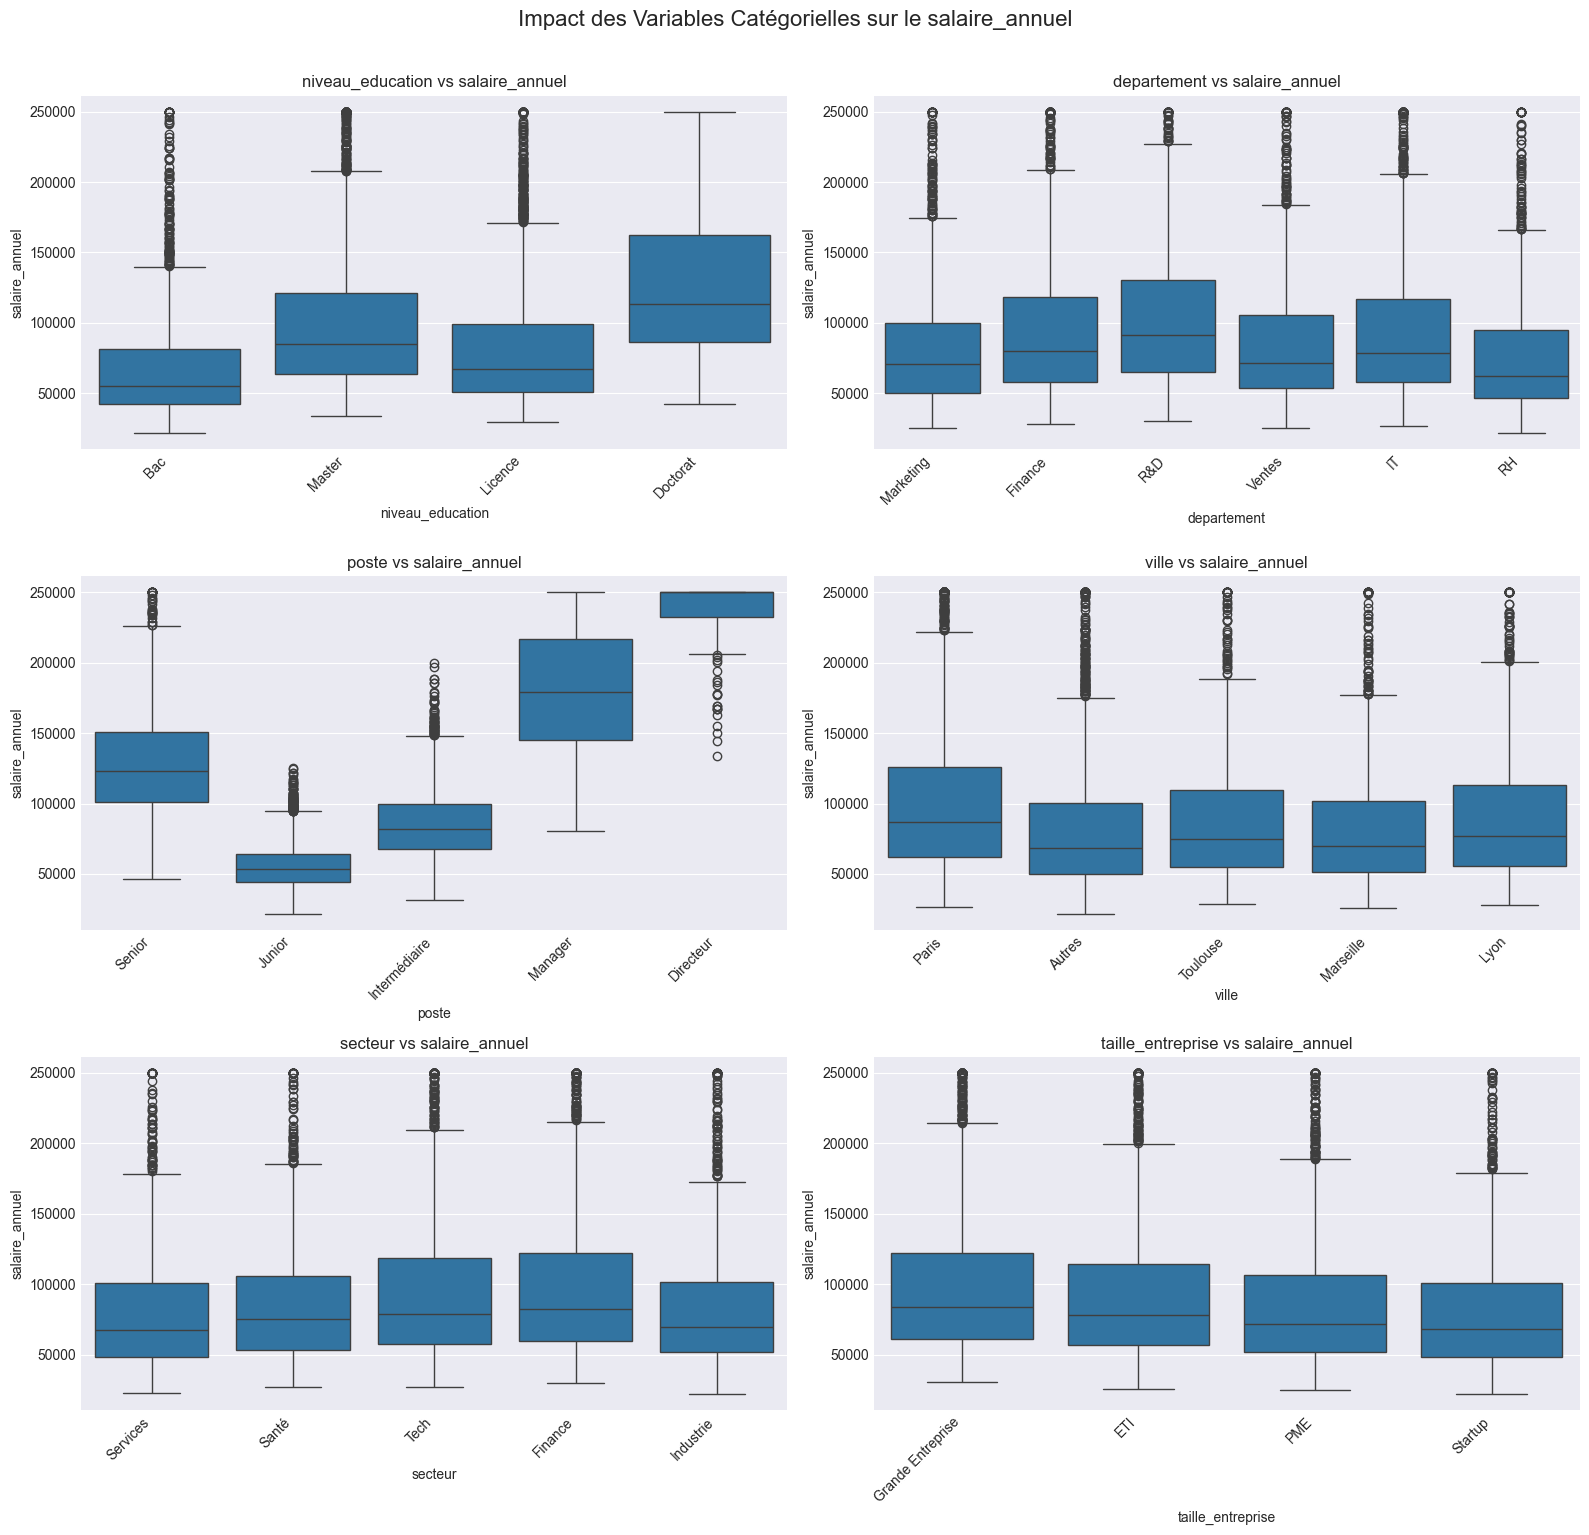


--- 4. Heatmap de Corrélation entre Variables Numériques ---


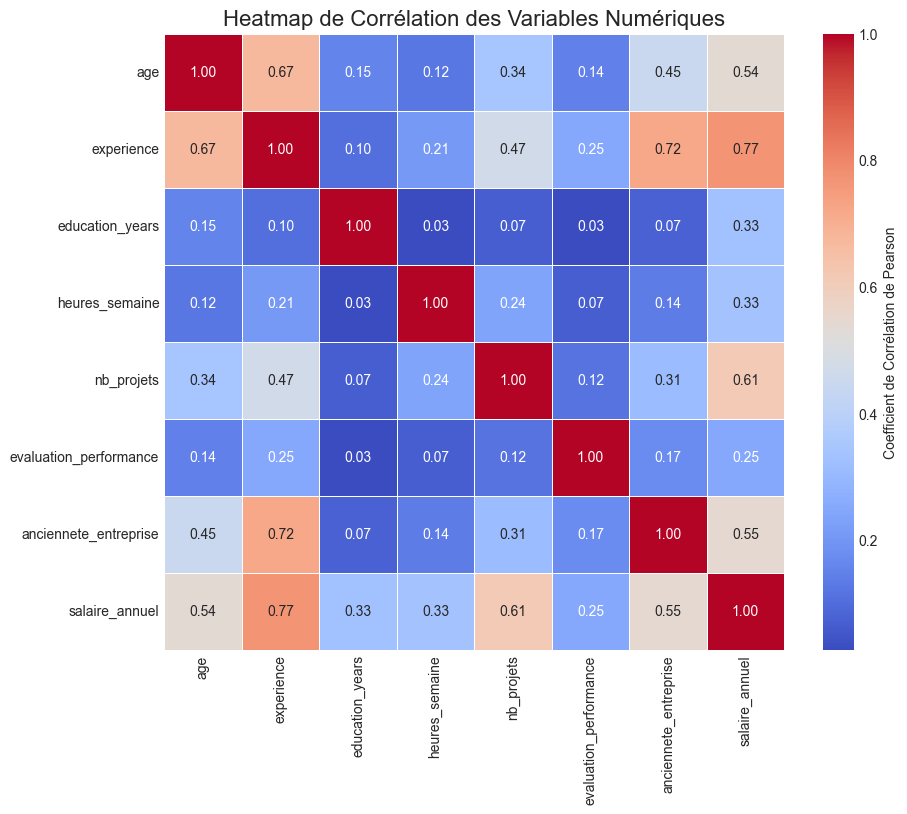

In [33]:
# Analyse des données

# TO DO : Analyser les données avec des visualisations appropriées (histogrammes, boxplots, heatmap de corrélation, etc.) 
# pour comprendre la distribution des variables et leurs relations avec la variable cible 'salaire'
TARGET_VAR = 'salaire_annuel' 

## 1. Analyse de la Distribution des Variables Numériques (Histogrammes et Boxplots)

print("--- 1. Analyse des Variables Numériques (Distribution et Outliers) ---")

# Création d'une figure avec des sous-graphiques pour chaque variable numérique
n_cols = 3
n_rows = len(num_vars) * 2 // n_cols + (len(num_vars) * 2 % n_cols > 0)
plt.figure(figsize=(n_cols * 5, n_rows * 2.5))
plt.suptitle('Distribution des Variables Numériques (Histogrammes et Boxplots)', y=1.02, fontsize=16)

# On itère sur toutes les colonnes numériques
for i, col in enumerate(num_vars):
    # Histogramme
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

    # Boxplot pour les outliers
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 1.01]) # Ajuste l'espacement entre les graphiques
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

## 2. Relation Variable Numérique vs Cible 'salaire' (Scatter Plots)

print("\n--- 2. Relation Variable Numérique vs Cible 'salaire' (Nuages de points) ---")

# On retire la variable cible de la liste des variables à tracer contre elle-même
features_to_plot = [col for col in num_vars if col != TARGET_VAR]

n_cols_scatter = 3
n_rows_scatter = len(features_to_plot) // n_cols_scatter + (len(features_to_plot) % n_cols_scatter > 0)
plt.figure(figsize=(n_cols_scatter * 6, n_rows_scatter * 4))
plt.suptitle(f'Relation des Variables Numériques avec le {TARGET_VAR}', y=1.02, fontsize=16)

for i, col in enumerate(features_to_plot):
    plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
    # Scatter plot avec droite de régression pour visualiser la corrélation
    sns.regplot(x=df[col], y=df[TARGET_VAR], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'{col} vs {TARGET_VAR}')
    plt.xlabel(col)
    plt.ylabel(TARGET_VAR)

plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

## 3. Relation Variable Catégorielle vs Cible 'salaire' (Boxplots)

print("\n--- 3. Relation Variable Catégorielle vs Cible 'salaire' (Boxplots) ---")

n_cols_cat = 2
n_rows_cat = len(cat_vars) // n_cols_cat + (len(cat_vars) % n_cols_cat > 0)
plt.figure(figsize=(n_cols_cat * 8, n_rows_cat * 5))
plt.suptitle(f'Impact des Variables Catégorielles sur le {TARGET_VAR}', y=1.02, fontsize=16)

for i, col in enumerate(cat_vars):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    # Boxplot pour comparer la distribution du salaire par catégorie
    sns.boxplot(x=df[col], y=df[TARGET_VAR])
    plt.title(f'{col} vs {TARGET_VAR}')
    plt.xlabel(col)
    plt.ylabel(TARGET_VAR)
    plt.xticks(rotation=45, ha='right') # Rotation des étiquettes pour la lisibilité

plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

## 4. Heatmap de Corrélation

print("\n--- 4. Heatmap de Corrélation entre Variables Numériques ---")

# Calcul de la matrice de corrélation
correlation_matrix = df[num_vars].corr()

plt.figure(figsize=(10, 8))
# Création de la heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,        # Afficher les valeurs de corrélation
    cmap='coolwarm',   # Palette de couleurs (rouge/bleu pour les corrélation positives/négatives)
    fmt=".2f",         # Format des nombres à deux décimales
    linewidths=.5,     # Lignes entre les cellules
    cbar_kws={'label': 'Coefficient de Corrélation de Pearson'}
)
plt.title('Heatmap de Corrélation des Variables Numériques', fontsize=16)
plt.show()

## 2. Préparation des Données

### 2.1 Séparation des features et de la cible

In [6]:
# Séparation des features (X) et de la cible (y)

# Séparer les données en dataset de features (X) et dataset de cible (y)

In [7]:
# Division en ensemble d'entraînement et de test (80/20)

# Spliter les données en ensembles d'entraînement et de test (80/20) et utiliser l'arribut random_state=42 

### 2.2 Preprocessing Pipeline

Nous allons créer un pipeline de preprocessing qui:
1. Impute les valeurs manquantes pour les variables numériques
2. Applique le scaling sur les variables numériques
3. Applique le one-hot encoding sur les variables catégorielles

In [8]:
# TO DO : implémenter des stratégie de prétraitement des données numériques et catégorielles en utilisant ColumnTransformer et Pipeline

## 3. Modélisation

### 3.1 Modèle de Base - DummyRegressor

In [9]:
# TO DO : Entrainer un modèle DummyRegressor, qui servira de baseline, et évaluer ses performances sur l'ensemble de test

### 3.2 Régression Linéaire Simple

In [10]:
# TO DO : Entrainer un modèle de régression linaire

In [11]:
# TO DO : afficher les valeurs prédites par le modèle linéaire vs les valeurs réelles du dataset de test

In [12]:
# TO DO : afficher les valeurs des coefficients du modèle linéaire

## 4. Régularisation avec GridSearchCV

In [13]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 2, 20),
#    - 'selection': ['cyclic', 'random']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test 

In [14]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 3, 20),
#    - 'solver': ['auto', 'svd', 'cholesky', 'lsqr']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test

## 5. Résumé et Comparaison Finale

In [15]:
# TO : Afficher pour chaque modèle (dummy, linéaire, ridge, lasso) les performances sur l'ensemble d'entrainement et de test et conclure
# sur le choix du modèle et sa capacité de généralisation